In [2]:
from wand.image import Image as WImage

# Лабораторная работа 3. Инеративные и рекурсивные алгоритмы

**Цель работы:** изучить рекурсивные алгоритмы и рекурсивные структуры данных; научиться проводить анализ итеративных и рекурсивных процедур; исследовать эффективность итеративных и  рекурсивных процедур при реализации на ПЭВМ.

**Продолжительность работы:** - 4 часа. 

**Мягкий дедлайн (10 баллов)**: 15.04.2023 

**Жесткий дедлайн (5 баллов)**: 29.04.2023



## Теоретические сведения



Реализуйте рекурсивный алгоритм для вычисления квадратного корня числа. В качестве исходных данных используйте тройку чисел 
N, A, E, где 
N - число, из которого требуется извлечь квадратный корень, 
A - приближенное значение корня, 
E - допустимая ошибка результата.

### Классификация алгоритмов

### Реализация с рекурсией

In [1]:
def sqrt_recursive(N, A, E):
    if abs(A * A - N) < E:
        return A
    else:
        next_approximation = (A + N / A) / 2
        return sqrt_recursive(N, next_approximation, E)

N = 9
A = 1
E = 0.0001
result = sqrt_recursive(N, A, E)
print("Квадратный корень числа", N, "с допустимой ошибкой", E, "равен", result)


Квадратный корень числа 9 с допустимой ошибкой 0.0001 равен 3.000000001396984


### Реализация без рекурсии

In [2]:
def sqrt_non_recursive(N, A, E):
    while abs(A * A - N) >= E:
        A = (A + N / A) / 2
    return A

N = 9
A = 1
E = 0.0001
result = sqrt_non_recursive(N, A, E)
print("Квадратный корень числа", N, "с допустимой ошибкой", E, "равен", result)


Квадратный корень числа 9 с допустимой ошибкой 0.0001 равен 3.000000001396984


### Блок-схема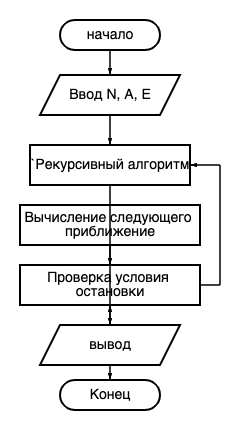

### Оцените верхнюю границу размерности задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов;

In [7]:
import sys
print(sys.getrecursionlimit())

3000


### Mодернизируйте рекурсивную реализацию так, чтобы сохранялись промежуточные результаты вызова рекурсии (реализуйте подобный механизм вручную, а также, с помощью декоратора @memoized);

In [10]:
def sqrt_recursive_modified(N, A, E, memo=None):
    if memo is None:
        memo = {}
    
    if abs(A * A - N) < E:
        return A

    if A not in memo:
        next_approximation = (A + N / A) / 2
        memo[A] = sqrt_recursive_modified(N, next_approximation, E, memo)

    return memo[A]

def memoized(func):
    cache = {}
    
    def memoized_func(*args, **kwargs):
        key = (args, tuple(kwargs.items()))
        if key not in cache:
            cache[key] = func(*args, **kwargs)
        return cache[key]
    
    return memoized_func

@memoized
def sqrt_recursive_memoized(N, A, E):
    if abs(A * A - N) < E:
        return A
    else:
        next_approximation = (A + N / A) / 2
        return sqrt_recursive_memoized(N, next_approximation, E)


### Сравните производительность реализованных алгоритмов (количество итераций (соответственно вызовов рекурсии) подбирайте исходя из условий задачи).

In [11]:
import timeit

N = 1234567
A = 1
E = 0.00001

# Нерекурсивная функция
def sqrt_iterative(N, A, E):
    while abs(A * A - N) >= E:
        A = (A + N / A) / 2
    return A

# Обычная рекурсивная функция
def sqrt_recursive(N, A, E):
    if abs(A * A - N) < E:
        return A
    else:
        return sqrt_recursive(N, (A + N / A) / 2, E)

# Модифицированный рекурсивный алгоритм с ручной мемоизацией
def sqrt_recursive_modified(N, A, E, memo=None):
    if memo is None:
        memo = {}
    
    if abs(A * A - N) < E:
        return A

    if A not in memo:
        next_approximation = (A + N / A) / 2
        memo[A] = sqrt_recursive_modified(N, next_approximation, E, memo)

    return memo[A]

# Рекурсивный алгоритм с декоратором @memoized
@memoized
def sqrt_recursive_memoized(N, A, E):
    if abs(A * A - N) < E:
        return A
    else:
        next_approximation = (A + N / A) / 2
        return sqrt_recursive_memoized(N, next_approximation, E)

# Сравнение производительности
iterative_time = timeit.timeit(lambda: sqrt_iterative(N, A, E), number=1000)
recursive_time = timeit.timeit(lambda: sqrt_recursive(N, A, E), number=1000)
modified_recursive_time = timeit.timeit(lambda: sqrt_recursive_modified(N, A, E), number=1000)
memoized_recursive_time = timeit.timeit(lambda: sqrt_recursive_memoized(N, A, E), number=1000)

print("Нерекурсивный алгоритм:", iterative_time)
print("Обычный рекурсивный алгоритм:", recursive_time)
print("Модифицированный рекурсивный алгоритм:", modified_recursive_time)
print("Рекурсивный алгоритм с декоратором @memoized:", memoized_recursive_time)


Нерекурсивный алгоритм: 0.003166871960274875
Обычный рекурсивный алгоритм: 0.0040139720076695085
Модифицированный рекурсивный алгоритм: 0.006062737025786191
Рекурсивный алгоритм с декоратором @memoized: 0.0005767979891970754


## Литература

Дональд Э. Кнут. Искусство программирования, том 2. Получисленные алгоритмы = The Art of Computer Programming, vol.2. Seminumerical Algorithms, 3-ed. — Вильямс, 2007. — С. 832. — ISBN 978-5-8459-0081-4.

Роберт Седжвик. Фундаментальные алгоритмы на C. Анализ/Структуры данных/Сортировка/Поиск = Algorithms in C. Fundamentals/Data Structures/Sorting/Searching. — СПб.: ДиаСофтЮП, 2003. — С. 672. — ISBN 5-93772-081-4.